# Titanic - Machine Learning from Disaster

In [61]:
#import lib 
import pandas as pd
import numpy as np 
import seaborn as sns

In [62]:
# from google.colab import drive
# drive.mount('/content/drive')

In [63]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

In [64]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [68]:
train_df.drop('PassengerId', axis=1, inplace= True )

In [69]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
test_df = pd.read_csv('./Data/test.csv', index_col="PassengerId")
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Phan loai du lieu 
- Categorical : 'Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked'
- Numerical:'Age','Fare'
- Contain Eror/typo : 'Name'
- Mixed data : 'Ticket', 'Cabin'

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [73]:
train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [74]:
features = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
def convert_type(df, features): 
    for feature in features :
        df[feature] = df[feature].astype('category')
convert_type(train_df, features)
convert_type(test_df, features)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [75]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# EDA

In [76]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

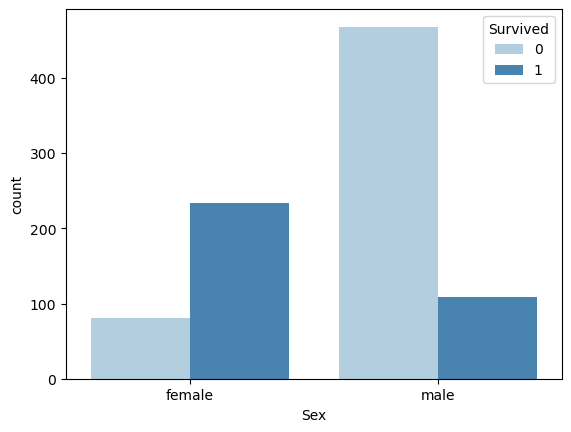

In [77]:
sns.countplot(data= train_df, x = 'Sex', hue ='Survived', palette='Blues')

In [78]:
import matplotlib.pyplot as plt

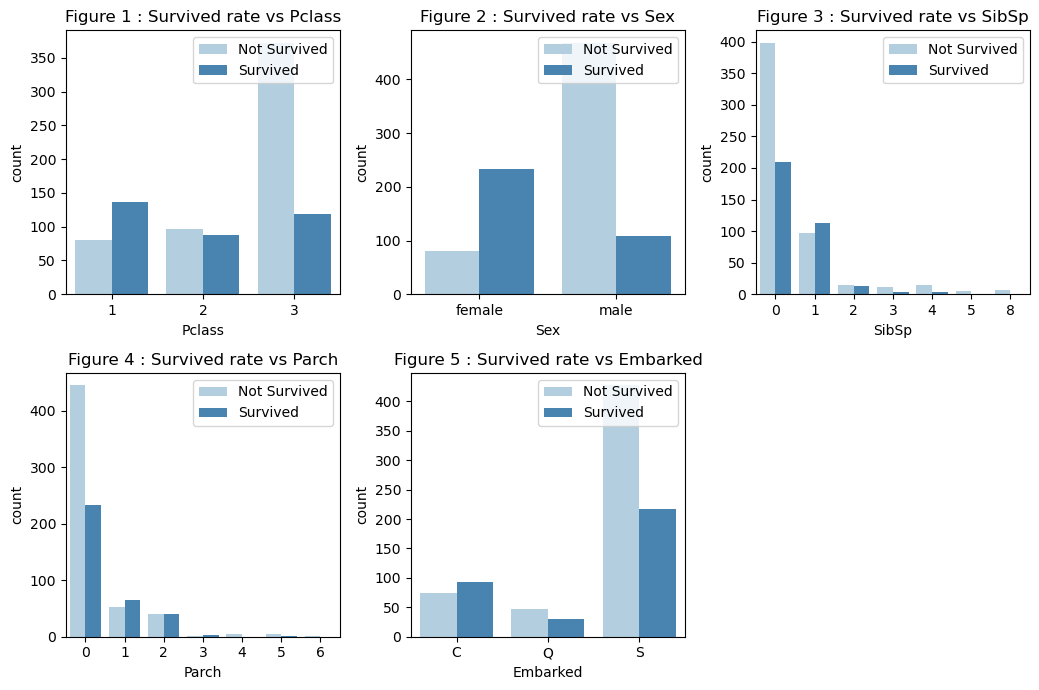

In [79]:

cols = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows): 
    for c in range(0, n_cols): 
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data= train_df, x = cols[i], hue ='Survived', palette='Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1} : Survived rate vs {cols[i]}")
            ax_i.legend(title ='', loc = 'upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #remove the last subplot
plt.tight_layout()

**EDA for numerical features:
Age, Fare
**

<Axes: xlabel='Age', ylabel='Count'>

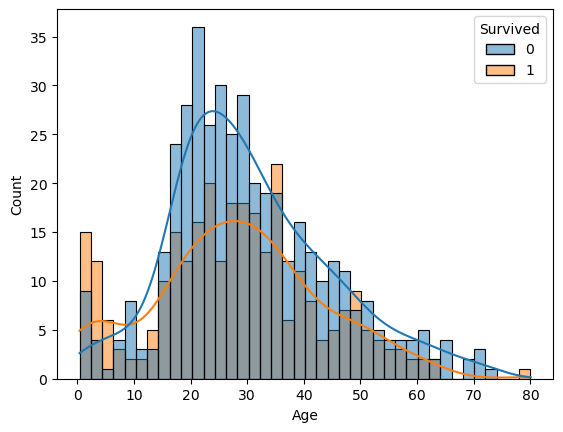

In [80]:
sns.histplot(data = train_df, x = 'Age', hue = 'Survived' , bins = 40, kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

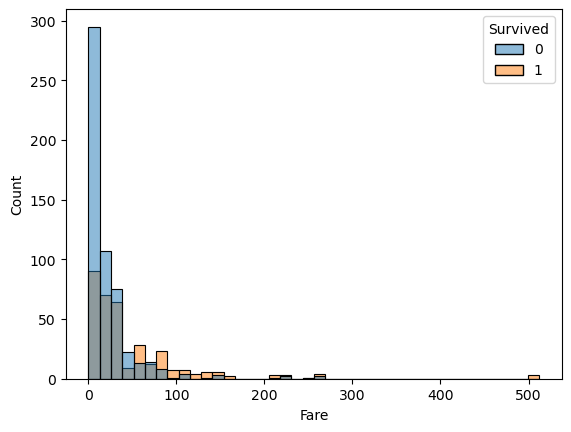

In [81]:
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 40)

<Axes: xlabel='Fare', ylabel='count'>

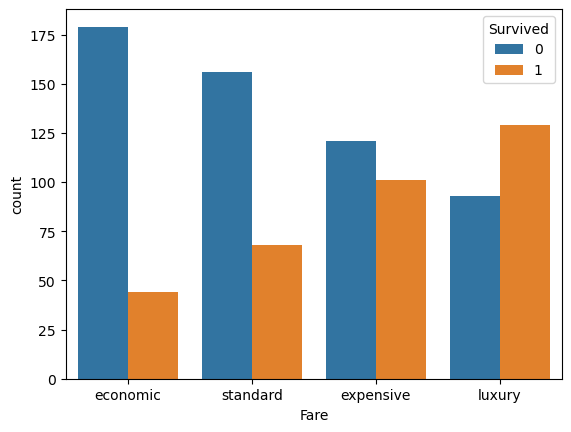

In [82]:
fare_categories = ['economic', 'standard', 'expensive', 'luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x=quartile_data, hue = train_df['Survived'])

Features Engineering & Data wranging

Name 
- Regular Expression

In [83]:
import re #regular expression
def extract_title(name): 
  p = re.compile(r"([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [84]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [85]:
def group_title(title): 
  if title in ['Mr', 'Miss', 'Mrs', 'Master']:
    return title 
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others' 


In [20]:
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [21]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

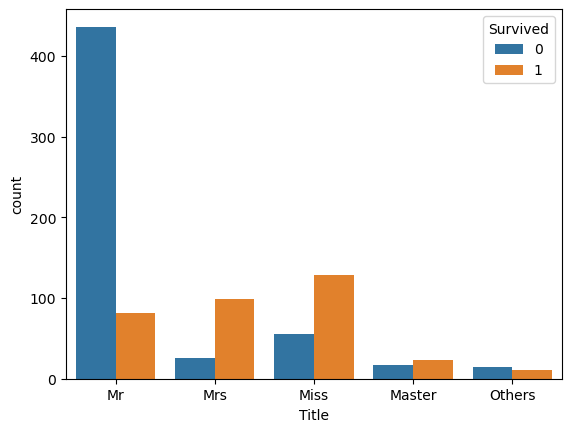

In [22]:
sns.countplot(data = train_df, x= 'Title', hue = train_df['Survived'])

In [23]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') +  train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') +  test_df['Parch'].astype('int') + 1

In [24]:
train_df["Family_Category"] = pd.cut(train_df["Family_Size"], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large'])
test_df["Family_Category"] = pd.cut(test_df["Family_Size"], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large'])

<Axes: xlabel='Family_Category', ylabel='count'>

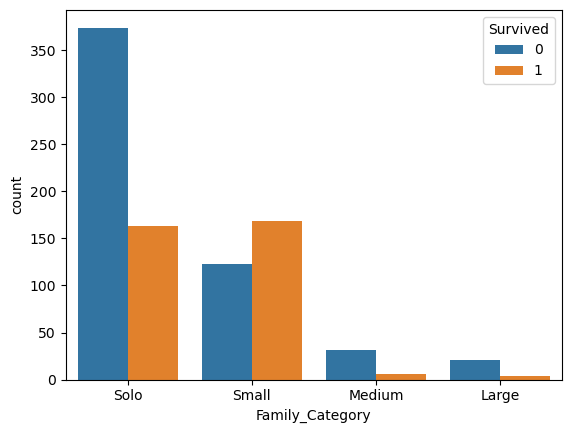

In [25]:
sns.countplot(data = train_df, x= 'Family_Category', hue = train_df['Survived'])

**Data Wrangling**



In [26]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small


In [27]:
num_features = ['Age', 'Fare']
cat_features = [ 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_Category']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_Category']

In [28]:
def display_missing(df, feature_cols):
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count} missing values.")
print('train: ')
display_missing(train_df, feature_cols)
print('test: ')
display_missing(test_df, feature_cols)

train: 
Age has 177 missing values.
Embarked has 2 missing values.
test: 
Age has 86 missing values.
Fare has 1 missing values.


**Fill missing values**

fill missing values  with median values of whose dataset

In [29]:
avg_age_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']
avg_age_sex_pclass


C:\Users\LamDat\AppData\Local\Temp\ipykernel_16148\2681031615.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_age_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [30]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

C:\Users\LamDat\AppData\Local\Temp\ipykernel_16148\1560180498.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
C:\Users\LamDat\AppData\Local\Temp\ipykernel_16148\1560180498.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .

In [31]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Embarked has 2 missing values.
Fare has 1 missing values.


In [32]:
x = train_df[feature_cols]
y = train_df['Survived']

In [33]:
x_test = test_df[feature_cols]

In [34]:
from numba.core.types import SimpleIteratorType
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import  SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('impuler', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [36]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impuler',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked', 'Title',
                                  'Family_Category'])])

In [37]:
x_test = preprocessor.transform(x_test)

In [38]:
x = preprocessor.transform(x)

**TRAIN MODEL**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_val, y_train , y_val = train_test_split(x, y, test_size = 0.2)

In [41]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [42]:
#binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [43]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [44]:
log_reg.score(x_val, y_val)

0.8435754189944135

In [45]:
y_pred = log_reg.predict(x_val)
 

In [46]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7142857142857143, 0.8181818181818182)

In [47]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       124
           1       0.71      0.82      0.76        55

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.85       179



In [48]:
poly = PolynomialFeatures(degree = 2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val) 


In [49]:
poly_log_reg = LogisticRegression(solver ='liblinear', max_iter =  1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [50]:
y_poly_pred = poly_log_reg.predict(poly_features_x_val)

In [51]:
print(classification_report(y_val, y_poly_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       124
           1       0.74      0.84      0.79        55

    accuracy                           0.86       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.87      0.86      0.86       179



DECISION TREE


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
decision_tree = DecisionTreeClassifier(random_state=2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [54]:
decision_tree.score(x_val, y_val)

0.8100558659217877

**CROSS-VALIDATION**

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
log_rev_cv = LogisticRegression(solver = 'liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(max_depth = 8, random_state=2022)
lr_scores1 = cross_val_score(log_rev_cv, x, y, scoring = 'accuracy', cv = 5)
lr_scores2 = cross_val_score(dt_cv, x, y, scoring = 'accuracy', cv = 5)

In [57]:
lr_scores1.mean(), lr_scores1.std()

(0.826031008725127, 0.020466357172416235)

In [58]:
lr_scores2.mean(), lr_scores2.std()

(0.793528340970435, 0.02381749439783201)

**BASELINE Model **

In [59]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost
seed = 2023
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)    
]

C:\Users\LamDat\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [60]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X,y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    # sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    return baseline_results
    
generate_baseline_results(models, x, y, metrics='accuracy', cv=5, plot_results=False)

C:\Users\LamDat\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\LamDat\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\LamDat\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\LamDat\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\LamDat\anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
KNeighborsClassifier,0.810301,0.013789
RandomForestClassifier,0.810288,0.024909
ExtraTreesClassifier,0.802454,0.017233
DecisionTreeClassifier,0.787879,0.018791
